<h1> Linear Regression.py </h1>

(4, 2)
(2,)


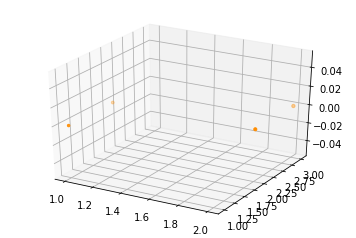

1.0
[1. 2.]
3.0000000000000018
[16.]


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#4x2
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3] ])
print(X.shape)
# y = 1 * x_0 + 2 * x_1 + 3 
#2
y = np.dot(X, np.array([1, 2])) + 3
print(np.array([1, 2]).shape)

# Visualize your data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0],X[:,1], y)
plt.scatter(X[:,0],X[:,1], y, color='darkorange', label='data')
plt.show()

reg = LinearRegression()
plane = reg.fit(X, y)

print(reg.score(X, y)) # R squared
print(reg.coef_) # Coefficients           # y = 1 * x_0 + 2 * x_1 + 3
print(reg.intercept_ ) # y-intercept
print(reg.predict(np.array([[3, 5]])))


<h1>Linear_Nonlinear_RBF_Regression.py </h1>

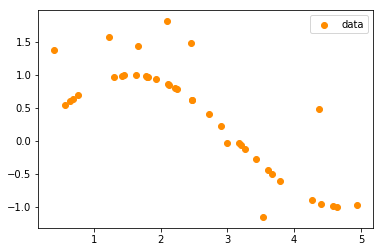

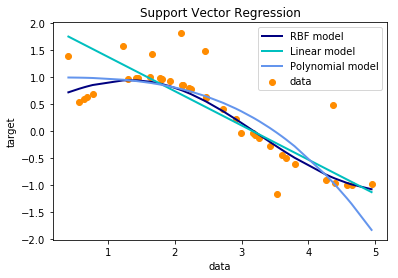

In [10]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to data
y[::5] += 3 * (0.5 - np.random.rand(8)) # generate 8 random numbers to add 

# Visualize your data
plt.scatter(X, y, color='darkorange', label='data')
plt.legend()
plt.show()

# Fit regression model

svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C= 1e3, degree=3)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Look at the results

lw = 2 # line width
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


<h1> Measuring Regression Quality <h1>

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination(R2) score: 0.47


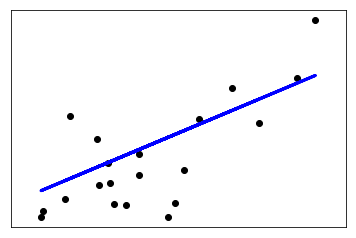

In [2]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #from first element to element 20 (from back) 
diabetes_X_test = diabetes_X[-20:] #element 20 (from back) to end

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R2) score: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
